# Investigating Fandango Movie Ratings

#### Darren Ho

## Is Fandango Still Inflating Ratings?

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found [strong evidence](https://fivethirtyeight.com/features/fandango-movies-ratings/) to suggest that Fandango's rating system was biased and dishonest. Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars. Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

- The actual ratings was almost always rounded *up* to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars
- For one movie rating, the rounding off was completely bizarra: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars

In this project, we'll analyze more recent movie ratings data to determind whether there has been any change in Fandango's rating system after Hickey's analysis.

## Understanding the Data

We'll compare the characteristics of Fandango's rating system with data before Hickey's analysis and data after the analysis. We'll be using:

- Walt Hickey's data that he analyzed ([GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango))
- Dataset containing movie ratings for movies released in 2016 and 2017 ([GitHub](https://github.com/mircealex/Movie_ratings_2016_17))

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
import seaborn as sns
%matplotlib inline

before = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

before.head()

FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70           4.3         ...                3.90            3.5   
1     4.25           4.0         ...                3.55            4.5   
2     4.00           4.5         ...                3.90            4.0   
3     0.90           4.2         ...                2.70            1.0   
4     0.70           1.4         ...                2.55            0.5   

   RT_user_norm_round  Metacritic_norm_round  Metacritic_user_norm_round  \
0                 4.5                    3.5                         3.5   
1                 4.0                    3.5                         4.0   
2                 4.5                    3.0                         4.0   
3                 4.0                    1.0                         2.5   
4                 1.5                    1.5                         1.5   

   IMDB_norm_round  Metacritic_user_vote_count  IMDB_user_vote_count  \
0              4.0                        1330                271107   
1              3.5                         249                 65709   
2              4.0                         627                103660   
3              2.5                          31                  3136   
4              2.5                          88                 19560   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5  

[5 rows x 22 columns]

In [2]:
after.head()

movie  year  metascore  imdb  tmeter  audience  fandango  \
0      10 Cloverfield Lane  2016         76   7.2      90        79       3.5   
1                 13 Hours  2016         48   7.3      50        83       4.5   
2      A Cure for Wellness  2016         47   6.6      40        47       3.0   
3          A Dog's Purpose  2017         43   5.2      33        76       4.5   
4  A Hologram for the King  2016         58   6.1      70        57       3.0   

   n_metascore  n_imdb  n_tmeter  n_audience  nr_metascore  nr_imdb  \
0         3.80    3.60      4.50        3.95           4.0      3.5   
1         2.40    3.65      2.50        4.15           2.5      3.5   
2         2.35    3.30      2.00        2.35           2.5      3.5   
3         2.15    2.60      1.65        3.80           2.0      2.5   
4         2.90    3.05      3.50        2.85           3.0      3.0   

   nr_tmeter  nr_audience  
0        4.5          4.0  
1        2.5          4.0  
2        2.0          2.5  
3        1.5          4.0  
4        3.5          3.0

In [3]:
# Isloating columns that offer info about Fandango's ratings so we have just the data we're interested in

fandango_before = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

fandango_before.head()

FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   
2                  Ant-Man (2015)             5.0                   4.5   
3          Do You Believe? (2015)             5.0                   4.5   
4   Hot Tub Time Machine 2 (2015)             3.5                   3.0   

   Fandango_votes  Fandango_Difference  
0           14846                  0.5  
1           12640                  0.5  
2           12055                  0.5  
3            1793                  0.5  
4            1021                  0.5

In [4]:
fandango_after.head()

movie  year  fandango
0      10 Cloverfield Lane  2016       3.5
1                 13 Hours  2016       4.5
2      A Cure for Wellness  2016       3.0
3          A Dog's Purpose  2017       4.5
4  A Hologram for the King  2016       3.0

Our goal for this project is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. With that being said, our population of interest for our goal is all the movie ratings from Fandango.

Reading Hickey's `README.md` on [GitHub](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md), we can conclude that the sampling was not random, and that all movies did not have an equal chance to be included in the sample because every film needed: 

- Rotton Tomatoes Rating & RT User Rating
- Metacritic User score
- IMDB Score
- At least 30 fan reviews on Fandango

Because of this, we can conclude that the `before` dataset is not representative of the entire population.

As for the `after` dataset, reading the `README.md` on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md), we can also conclude that the sampling was not random, and that all movies did not have an equal chance to be included in the sample because the dataset only included the most popular movies (with a significant number of votes) released in 2016 and 2017. Because of this, we can conclude that the `after` dataset is probably not representative of the entire population.

## Changing the Goal of our Analysis

Due to the setbacks we came across, we have to come up with creative workarounds that are good enough. We have two alternatives: either collect new data, or change the goal of our analysis by placing some limitations on it. Tweaking our goal seems a much faster choice compared to collecting new data.  

Let's find out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015
- All Fandango's ratings for popular movies released in 2016

The term 'popular' is vague, so we'll use Hickey's benchmark of **30 fan ratings or more** when classifying a movie as 'popular'

## Isolating the Samples We Need

First, we'll check if both samples contain popular movies - that is, check whether all (or at least most) sample points are movies with over 30 fan ratings on Fandango's webiste. 

The `fandango_after` dataset does not provide information about the number of fan ratings, and this raises representativity issues once again. 

In [5]:
fandango_after.sample(10, random_state=4)

movie  year  fandango
34                 Central Intelligence  2016       4.5
199                       The Wild Life  2016       3.0
111                Miracles from Heaven  2016       4.5
18   Batman V Superman: Dawn of Justice  2016       4.0
92             Kubo and the Two Strings  2016       4.5
1                              13 Hours  2016       4.5
165                The Brothers Grimsby  2016       3.5
134     Pride and Prejudice and Zombies  2016       4.0
91                   Kong: Skull Island  2017       4.0
83                       Jane Got a Gun  2016       3.5

In [6]:
data = {'Movie': ["Central Intelligence","The Wild Life","Miracles from Heaven","Batman V Superman: Dawn of Justice",
                 "Kubo and the Two Strings","13 Hours","The Brothers Grimsby","Pride and Prejudice and Zombies","Kong: Skull Island","Jane Got a Gun"],
        'Fan Ratings': [55053, 2989, 22149, 237484, 35641, 33765, 15033, 9227, 55039, 14068]}
fandango_ratings = pd.DataFrame(data)
fandango_ratings = fandango_ratings.reindex(columns=['Movie','Fan Ratings'])


fandango_ratings

Movie  Fan Ratings
0                Central Intelligence        55053
1                       The Wild Life         2989
2                Miracles from Heaven        22149
3  Batman V Superman: Dawn of Justice       237484
4            Kubo and the Two Strings        35641
5                            13 Hours        33765
6                The Brothers Grimsby        15033
7     Pride and Prejudice and Zombies         9227
8                  Kong: Skull Island        55039
9                      Jane Got a Gun        14068

We sampled 10 movies from the `fandango_after` dataset, and then manually checked the `Fan Ratings` of each movie using Fandango. We can see that all 10 movies in this sample have more than 30 fan ratings, which means that all 10 of the movies in this sample are deemed 'popular'. We can conclude that this sample contains enough popular movies to be representative of the population.  

In [7]:
sum(fandango_before['Fandango_votes'] < 30)

0

As for Hickey's dataset, none of the movies had less than 30 fan ratings, which means every movie in the dataset is popular. 

Now, we ned to isolate only the sample points that belong to our populations of interest

- Isolate the movies released in 2015 in a separate dataset
- Isolate the movies released in 2016 in a separate dataset

In [8]:
fandango_before['FILM'].head()

0    Avengers: Age of Ultron (2015)
1                 Cinderella (2015)
2                    Ant-Man (2015)
3            Do You Believe? (2015)
4     Hot Tub Time Machine 2 (2015)
Name: FILM, dtype: object

In [9]:
fandango_before['Year'] = fandango_before['FILM'].str[-5:-1]
fandango_before['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [10]:
fan_2015 = fandango_before[fandango_before['Year'] == '2015']
fan_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [11]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [12]:
fan_2016 = fandango_after[fandango_after['year'] == 2016]
fan_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes for 2015 and 2016

After the preliminary steps, we can now start analyzing the two samples we isolated. Once again, our goal is to determine whether there is any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. 

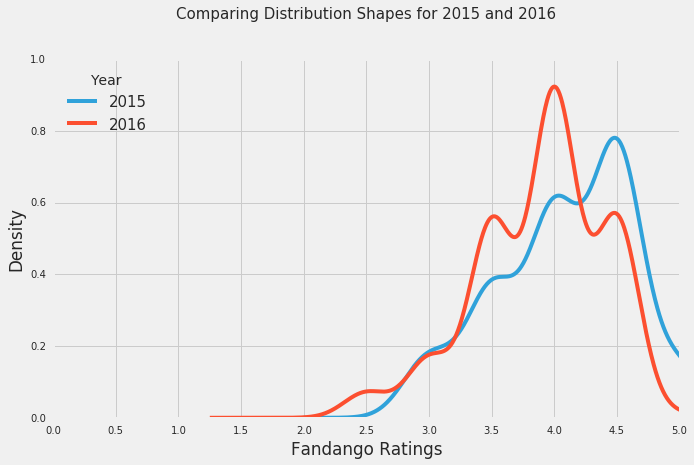

In [13]:
plt.style.use('fivethirtyeight')
fan_2015['Fandango_Stars'].plot.kde(label='2015', figsize=(10,6))
fan_2016['fandango'].plot.kde(label=2016)
plt.title('Comparing Distribution Shapes for 2015 and 2016', fontdict = {'fontsize' : 15}, y = 1.1)
plt.legend(fontsize=15, loc='upper left', title='Year')
plt.xlabel('Fandango Ratings')
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()

Both distributions appear to be left skewed. The 2016 distribution has a lot of movies around the 4.0 rating, whereas the 2015 distribution has a lot around the 4.5 rating. The 2016 distribution is shifted to the left relative to the 2015 distribution.  

Based on the graph, we can see evidence that suggests that there actually was a change between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can tell that movies in 2016 were rated lower compared to 2015. 

## Comparing Relative Frequencies

The kernal density plots showed that there's a clear difference between the two distributions in addition to information about the direction of the difference: movies in 2016 were rated slightly lower than those in 2015. 

While comparing the distributions with the help of the kernel density plots was a great start, we now need to analyze more granular information.

In [14]:
round(fan_2015['Fandango_Stars'].value_counts(normalize=True).sort_index(ascending=False)*100,2)

5.0     6.98
4.5    37.98
4.0    28.68
3.5    17.83
3.0     8.53
Name: Fandango_Stars, dtype: float64

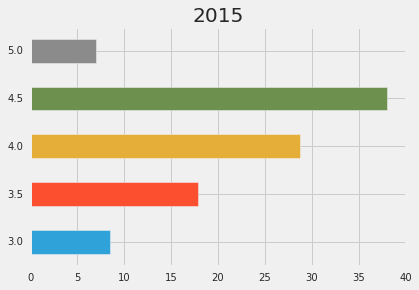

In [15]:
(fan_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100).plot.barh()
plt.title('2015')
plt.show()

In [16]:
round(fan_2016['fandango'].value_counts(normalize=True).sort_index(ascending=False)*100,2)

5.0     0.52
4.5    24.61
4.0    40.31
3.5    24.08
3.0     7.33
2.5     3.14
Name: fandango, dtype: float64

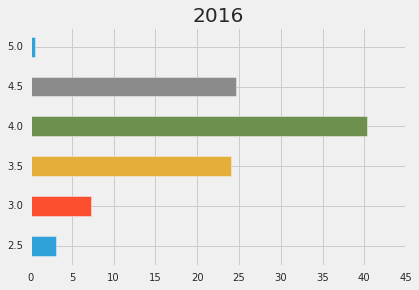

In [17]:
(fan_2016['fandango'].value_counts(normalize=True).sort_index()*100).plot.barh()
plt.title('2016')
plt.show()

The minimum rating of movies from 2015 was 3.0, whereas the minimum of movies from 2016 was 2.5. Only 0.52% of the 2016 movies were rated a 5.0, whereas approximately 7% of the 2015 movies were rated a 5.0. The amount of 4.5 and 5.0 rated movies decreased from 2015 to 2016, however the amount of 4.0 rated movies dramatically increased, as well as 3.5 rated movies.   

## Determining the Direction of the Change

We confirmed with the two tables before that there is indeed a clear difference between the two distributions. However, the direction of the difference is not as clear as it was on the kernel density plots.

We'll take a couple of summary statistics to get a more precise picture about the direction of the difference. 

In [18]:
mean_2015 = fan_2015['Fandango_Stars'].mean()
mean_2016 = fan_2016['fandango'].mean()

median_2015 = fan_2015['Fandango_Stars'].median()
median_2016 = fan_2016['fandango'].median()

mode_2015 = fan_2015['Fandango_Stars'].mode()[0]
mode_2016 = fan_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

2015      2016
mean    4.085271  3.887435
median  4.000000  4.000000
mode    4.500000  4.000000

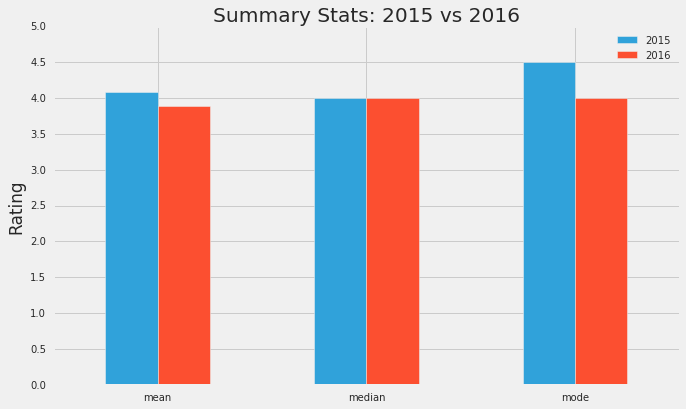

In [19]:
summary.plot.bar(rot=0, figsize=(10,6))
plt.title('Summary Stats: 2015 vs 2016')
plt.ylim(0,5)
plt.ylabel('Rating')
plt.yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()

The mean rating of popular 2015 movies was about 4.1 compared to the mean rating of approximately 3.9 for popular 2016 movies. Both distributions had a median of 4.0. The 2015 distribution had a mode of 4.5 compared to 2016's mode of 4.0. So although the median stayed the same from 2015 to 2016, the mean rating and the rating that appears the most often, both decreased.   

## Conclusion

Our analysis showed that there is indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies in 2016 were rated lower on Fandango than popular movies released in 2015. 

## Next Steps

Next steps to consider:

- Customize graphs more
- Improve project from a stylistical point of view
- Use the two samples to compare ratings of different movie ratings aggregators and recommend what's the best website to check movie rating
- Collect recent movie ratings data and formulate research questions